<center>
<h3> </h3> <!--Por alguna razon, esto es lo que permite que se centre-->
<h1>
  Proyecto: <b><u>World University Rankings(2024-5)</b></u>
</h1>
<h3>
  Laboratorio 1
</h3>

---

<h4>
  <b> Grupo 4: </b>  &nbsp; Vicente Rodriguez Rogers &nbsp; - &nbsp; Cristian Rioseco &nbsp; - &nbsp; Isidora Lemunao&nbsp;  -  &nbsp;Martin Astudillo
</h4>
</center>

***

<div style="text-align: center;">
  <img src="imagenes/picture_1.png" alt="Texto alternativo" />
</div>

## **Motivacion**
### &nbsp; &nbsp; &nbsp; Como estudiantes universitarios la calidad y el poscionamiento de las instituciones de educación superior son temas de sumo interés, Es por esto y por el valor intrinsico del analisis del ranking de universidades que decidicimos realizar nuestro proyecto sobre este tema.

### Nos sentimos particularmente motivados a explorar la dispersión de la calidad educativa a un nivel global. Entender cómo se distribuyen los centros de excelencia académica puede ser un conocimiento crucial a la hora de entender el como y donde se generan instituciones mas capacitadas para otorgar una educación de mayor valor.

### Este análisis nos permitirá no solo comprender mejor el panorama universitario global, sino también extraer conclusiones valiosas sobre los atributos que definen el éxito y la reputación de una institución.

## **Limpieza del dataset**

En esta sección se hará la limpieza del dataset con el objetivo de dejarlo en un estado utilizable para el completo análisis de nuestro interés. Se aplicaron ciertas transformaciones, en las cuales están:


*   Eliminación de filas vacías, duplicadas o que correspondan a encabezados repetidos.
*   Normalización de nombres de columnas para evitar duplicados y facilitar su lectura.
*   Conversión de variables a su tipo de dato correcto.
*   Estandarización de valores.

Como resultado, se obtiene un conjunto de datos limpio con 1503 instituciones registradas, de las cuales 600 poseen un puntaje global (OverallScore) disponible para los análisis posteriores.

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving 2025 QS World University Rankings 2.2 (For qs.com).xlsx to 2025 QS World University Rankings 2.2 (For qs.com) (1).xlsx


In [ ]:
df = pd.read_excel("2025 QS World University Rankings 2.2 (For qs.com).xlsx", header=2)
df.head()

,INDEX,RANK,RANK.1,Unnamed: 3,Location,Region,SIZE,FOCUS,RES.,STATUS,...,RANK.6,SCORE.5,RANK.7,SCORE.6,RANK.8,SCORE.7,RANK.9,Score,Rank,SCORE.8
0,INDEX,rank display,rank display2,institution,location code,location,size,focus,research,status,...,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
1,1,1,1,Massachusetts Institute of Technology (MIT),United States,Americas,M,CO,VH,B,...,100,86.8,143,96,58,100,8,99,15=,100
2,2,2,6,Imperial College London,United Kingdom,Europe,L,FC,VH,A,...,66,99.6,44,97.4,34,93.4,61,99.7,6,98.5
3,3,3,3,University of Oxford,United Kingdom,Europe,L,FC,VH,A,...,120,97.7,73,100,1,100,3,85,126,96.9
4,4,4,4,Harvard University,United States,Americas,L,FC,VH,B,...,269,69,215,99.6,5,100,1,84.4,130,96.8


En el extracto anterior se visualizan las primeras filas tal como se cargaron, para verificar estructura y encabezados.

In [ ]:
print("Todas las columnas disponibles en df:")
print(df.columns.tolist())

Todas las columnas disponibles en df:
['INDEX', 'RANK', 'RANK.1', 'Unnamed: 3', 'Location', 'Region', 'SIZE', 'FOCUS', 'RES.', 'STATUS', 'SCORE', 'RANK.2', 'SCORE.1', 'RANK.3', 'SCORE.2', 'RANK.4', 'SCORE.3', 'RANK.5', 'SCORE.4', 'RANK.6', 'SCORE.5', 'RANK.7', 'SCORE.6', 'RANK.8', 'SCORE.7', 'RANK.9', 'Score', 'Rank', 'SCORE.8']


In [3]:
import pandas as pd, numpy as np, re

fn = "2025 QS World University Rankings 2.2 (For qs.com).xlsx"

def make_unique(cols):
    seen, out = {}, []
    for c in cols:
        if c in seen: seen[c]+=1; out.append(f"{c}.{seen[c]}")
        else: seen[c]=0; out.append(c)
    return out

def find_col(df, options):
    low = {c.lower(): c for c in df.columns}
    for opt in options:
        if opt in low: return low[opt]
    for c in df.columns:
        cl = c.lower()
        if any(opt in cl for opt in options): return c
    return None

def clean_rank(x):
    if pd.isna(x): return np.nan
    s = str(x).replace("=", "")
    s = re.split(r"[-–]", s)[0]
    s = re.sub(r"[^\d]","", s)
    return pd.to_numeric(s, errors="coerce")

df = pd.read_excel(fn, header=1)
if isinstance(df.iloc[0,0], str) and df.iloc[0,0].strip().upper()=="INDEX":
    df = df.drop(0).reset_index(drop=True)

df.columns = make_unique(df.columns)
df.columns = df.columns.map(str)
df = df.dropna(how="all").drop_duplicates()
obj = df.select_dtypes(include="object").columns
df[obj] = df[obj].apply(lambda s: s.astype(str).str.strip())

m = {}
c = find_col(df, ["institution name","institution"]);         m[c]="Institution"            if c else None
c = find_col(df, ["country","location"]);                     m[c]="Country"                if c else None
c = find_col(df, ["overall score","overall"]);                m[c]="OverallScore"           if c else None
c = find_col(df, ["sustainabilityscore","sustainability score","sus score"]);  m[c]="SustainabilityScore" if c else None
c = find_col(df, ["sustainabilityrank","sustainability rank","sus rank"]);     m[c]="SustainabilityRank"  if c else None
c = find_col(df, ["rank2025","rank display"]);                m[c]="Rank2025"               if c else None
c = find_col(df, ["rank2024","rank display2"]);               m[c]="Rank2024"               if c else None
df = df.rename(columns={k:v for k,v in m.items() if k})

rank_cols  = [c for c in df.columns if str(c).upper().startswith("RANK")]
score_cols = [c for c in df.columns if str(c).upper().startswith("SCORE")] + ["OverallScore","SustainabilityScore"]

for c in rank_cols:
    df[c] = df[c].apply(clean_rank)

for c in score_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(
            df[c].astype(str).str.replace("%","",regex=False).str.replace(",",".",regex=False),
            errors="coerce"
        )

for c in ["Country","Region","SIZE","FOCUS","RES.","STATUS"]:
    if c in df.columns:
        df[c] = df[c].replace({"USA":"United States"}).astype("category")

if {"Institution","Country"}.issubset(df.columns):
    df = df[~df["Institution"].str.lower().eq("institution")]
    df = df[~df["Country"].astype(str).str.lower().eq("location code")]
    df = df.reset_index(drop=True)

rename_for_clean = {
    "2025": "Rank2025",
    "2024": "Rank2024",
    "Academic Reputation": "AR_Score",
    "Employer Reputation": "ER_Score",
    "Faculty Student": "FS_Score",
    "Citations per Faculty": "CPF_Score",
    "International Faculty": "IF_Score",
    "International Students": "IS_Score",
    "International Research Network": "IRN_Score",
    "Employment Outcomes": "EO_Score",
    "Sustainability": "SUS_Score",
    "OverallScore": "OverallScore"
}

cols_order = ["Institution","Country","Classification"] + list(rename_for_clean.keys())

cols_exist = [c for c in cols_order if c in df.columns and not c.lower().startswith("unnamed")]
df_clean = df[cols_exist].copy()
df_clean = df_clean.rename(columns=rename_for_clean)

metric_cols = [c for c in df_clean.columns if c.endswith("_Score") or c.startswith("Rank") or c=="OverallScore"]
for c in metric_cols:
    df_clean[c] = pd.to_numeric(df_clean[c], errors="coerce")

df_clean = df_clean.loc[:, ~df_clean.columns.str.lower().str.startswith("unnamed")]

df_scores = df_clean.dropna(subset=["OverallScore"]).reset_index(drop=True)
df_clean.to_csv("qs_rankings_clean.csv", index=False)
df_scores.to_csv("qs_rankings_clean_with_scores.csv", index=False)

print("Columnas finales:", len(df_clean.columns))
print(df_clean.columns.tolist())
print("Shape df_clean / df_scores:", df_clean.shape, df_scores.shape)


Columnas finales: 15
['Institution', 'Country', 'Classification', 'Rank2025', 'Rank2024', 'AR_Score', 'ER_Score', 'FS_Score', 'CPF_Score', 'IF_Score', 'IS_Score', 'IRN_Score', 'EO_Score', 'SUS_Score', 'OverallScore']
Shape df_clean / df_scores: (1503, 15) (600, 15)


## **Descripción de variables y datos**

 En este apartado nos encargaremos de realizar un análisis sobre distintos aspectos de nuestra base de datos, es por ello que para facilitar todo esto, haremos uso de la libreria "Skimpy", asi que partiremos con la instalación de este en caso de no poseerlo;


In [ ]:
pip install skimpy

Ahora procedemos a generar una tabla con un resumen de los datos encontrados en nuestro dataset.

In [4]:
#----------Settings----------
import pandas as pd
from  skimpy import skim

#-----Settings visuales------
#modificamos el ancho y cantidad de columnas que se muestran
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#----------Carga-------------
dataset_rankings = pd.read_csv('qs_rankings_clean_with_scores.csv')

skim(dataset_rankings)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 600    │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 15     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA  ┃ NA %                ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Rank2025      │   0 │                   0 │  299.8 │  172.9 │    1 │   150 │ 300.5 │ 448.8 │  596 │ ████▇█ │  │
│ │ Rank2024      │  30 │                   5 │  286.1 │  166.8 │    1 │   143 │   285 │ 426.8 │  600 │ ████▇▆ │  │
│ │ AR_Score      │   0 │                   0 │  37.72 │  26.58 │  3.1 │    18 │ 29.15 │ 53.05 │  100 │ ██▄▃▂▃ │  │
│ │ ER_Score      │   0 │                   0 │     37 │   28.5 │  1.8 │ 13.45 │  28.5 │    55 │  100 │ █▅▃▂▂▂ │  │
│ │ FS_Score      │   0 │                   0 │  38.71 │  31.02 │  1.9 │ 11.28 │  30.6 │  62.5 │  100 │ █▃▃▂▂▃ │  │
│ │ CPF_Score     │   0 │                   0 │  44.56 │  31.13 │  1.1 │ 17.48 │  40.7 │ 70.65 │  100 │ █▆▅▄▃▅ │  │
│ │ IF_Score      │   7 │  1.1666666666666667 │  50.91 │  36.72 │  1.1 │  14.2 │  46.3 │  91.6 │  100 │ ▇▄▃▂▂█ │  │
│ │ IS_Score      │   2 │  0.3333333333333333 │  41.97 │  34.73 │    1 │ 10.45 │ 31.85 │  74.8 │  100 │ █▃▂▂▂▅ │  │
│ │ IRN_Score     │   0 │                   0 │  72.57 │  22.73 │  3.5 │ 61.35 │  78.8 │  90.7 │  100 │ ▁▁▂▃▅█ │  │
│ │ EO_Score      │   0 │                   0 │  40.02 │  30.88 │  1.3 │    14 │ 31.45 │ 64.43 │  100 │ █▅▃▃▂▄ │  │
│ │ SUS_Score     │   0 │                   0 │  49.98 │  33.02 │    1 │    18 │ 51.35 │ 81.05 │  100 │ █▄▃▄▅▇ │  │
│ │ OverallScore  │   0 │                   0 │  41.84 │  18.83 │ 20.8 │ 26.58 │ 36.35 │  52.1 │  100 │ █▄▃▁▁▁ │  │
│ └───────────────┴─────┴─────────────────────┴────────┴────────┴──────┴───────┴───────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃          ┃           ┃           ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest ┃ longest   ┃ min       ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Instituti │  0 │    0 │ UCL      │ Tashkent  │ Aalborg   │ École     │       27.6 │       3.6 │       2140 │  │
│ │ on        │    │      │          │ Institute │ Universit │ Normale   │            │           │            │  │
│ │           │    │      │          │ of        │ y         │ Supérieur │            │           │            │  │
│ │           │    │      │          │ Irrigatio │           │ e de Lyon │            │           │            │  │
│ │           │    │      │          │ n and     │      

In [5]:
#----------Settings----------
import pandas as pd
from  skimpy import skim

#-----Settings visuales------
#modificamos el ancho y cantidad de columnas que se muestran
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#----------Carga-------------
dataset_rankings = pd.read_csv('qs_rankings_clean.csv')

skim(dataset_rankings)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1503   │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 15     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA   ┃ NA %                ┃ mean   ┃ sd    ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Rank2025      │  903 │  60.079840319361274 │  299.8 │ 172.9 │    1 │   150 │ 300.5 │ 448.8 │  596 │ ████▇█ │  │
│ │ Rank2024      │  904 │  60.146373918829006 │  299.3 │   173 │    1 │   150 │   300 │   446 │  600 │ ██████ │  │
│ │ AR_Score      │    0 │                   0 │  20.29 │ 22.33 │  1.3 │   6.3 │    11 │  23.5 │  100 │  █▂▁   │  │
│ │ ER_Score      │    0 │                   0 │  19.79 │ 23.78 │  1.1 │   4.3 │   9.4 │  25.3 │  100 │ █▂▁  ▁ │  │
│ │ FS_Score      │    0 │                   0 │  28.13 │ 27.61 │    1 │   7.3 │    16 │  40.4 │  100 │ █▃▂▁▁▁ │  │
│ │ CPF_Score     │    0 │                   0 │   23.5 │ 27.87 │    1 │   2.8 │   9.9 │  36.4 │  100 │ █▂▁▁▁▁ │  │
│ │ IF_Score      │  100 │    6.65335994677312 │  30.74 │ 34.34 │    1 │   4.2 │  12.5 │  51.6 │  100 │ █▂▁▁▁▂ │  │
│ │ IS_Score      │   58 │  3.8589487691284097 │  25.58 │  31.1 │    1 │   2.9 │   9.6 │  38.3 │  100 │ █▂▁▁▁▁ │  │
│ │ IRN_Score     │    1 │  0.0665335994677312 │  50.13 │ 29.87 │    1 │ 22.73 │  51.1 │  77.1 │  100 │ █▆▅▆▇▇ │  │
│ │ EO_Score      │    0 │                   0 │  23.83 │ 27.35 │  1.2 │     4 │  11.8 │  33.4 │  100 │ █▂▁▁▁▁ │  │
│ │ SUS_Score     │   19 │   1.264138389886893 │  24.31 │ 31.07 │    1 │   1.3 │  6.75 │  39.5 │  100 │ █▁▁▁▁▁ │  │
│ │ OverallScore  │  903 │  60.079840319361274 │  41.84 │ 18.83 │ 20.8 │ 26.58 │ 36.35 │  52.1 │  100 │ █▄▃▁▁▁ │  │
│ └───────────────┴──────┴─────────────────────┴────────┴───────┴──────┴───────┴───────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃          ┃           ┃           ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest ┃ longest   ┃ min       ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Instituti │  0 │    0 │ UCL      │ Tashkent  │ AGH       │ Óbuda     │       29.2 │       3.8 │       5684 │  │
│ │ on        │    │      │          │ Institute │ Universit │ Universit │            │           │            │  │
│ │           │    │      │          │ of        │ y of      │ y         │            │           │            │  │
│ │           │    │      │          │ Irrigatio │ Science   │           │            │           │            │  │
│ │           │    │      │          │ n and     │ and  

 ***Observaciones:***  <br>
 &nbsp; El resultado que nos entrego Skimpy nos permite sacar varias apreciaciones, Partiendo por los datos numericos, que como muestran nuestros histogramas, notamos rapidamente que existe una concentración de universidades posicionado en puntajes bajos, cosa corroborable con nuestra mediana ***(p50)*** que nos arroja el overallscore rondando los 36.5, y que contrasta un poco con el promedio ***(mean)*** que es de 41.84 mostrandonos que a pesar de la tendencia a la baja, existen universidades que muestran grandes capacidades para brindar una excelencia a sus alumnos, pero que aparentan ser mas que nada datos outlairs entre nuestro dataset. <br>
&nbsp; &nbsp;  No podemos dejar de lado las variables categoricas, ya que son gracias a ellas por la cual podemos permitirnos segmentar por regiones las distintas universidades y con ello poder análizar la dispersion de las universidades de calidad. pero a lo que respecta con este analisis de tipo, no hay mucho que mencionar a demas de notar la inexistencia de datos faltantes lo que nos da un buen pie para su posterior analisis.

# Creación de gráficos


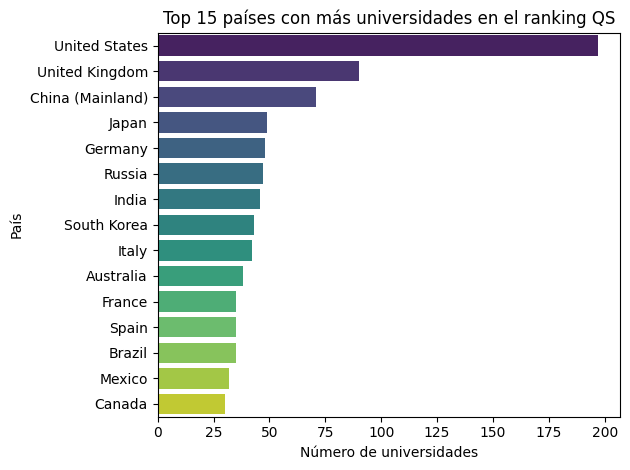

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("qs_rankings_clean.csv")

#Distribución de universidades por país (Top 15)
top_countries = df["Country"].value_counts().head(15).reset_index()
top_countries.columns = ["Country", "Count"]
sns.barplot(data=top_countries, x="Count", y="Country", hue="Country", dodge=False, palette="viridis", legend=False)
plt.title("Top 15 países con más universidades en el ranking QS")
plt.xlabel("Número de universidades")
plt.ylabel("País")
plt.tight_layout()
plt.show()

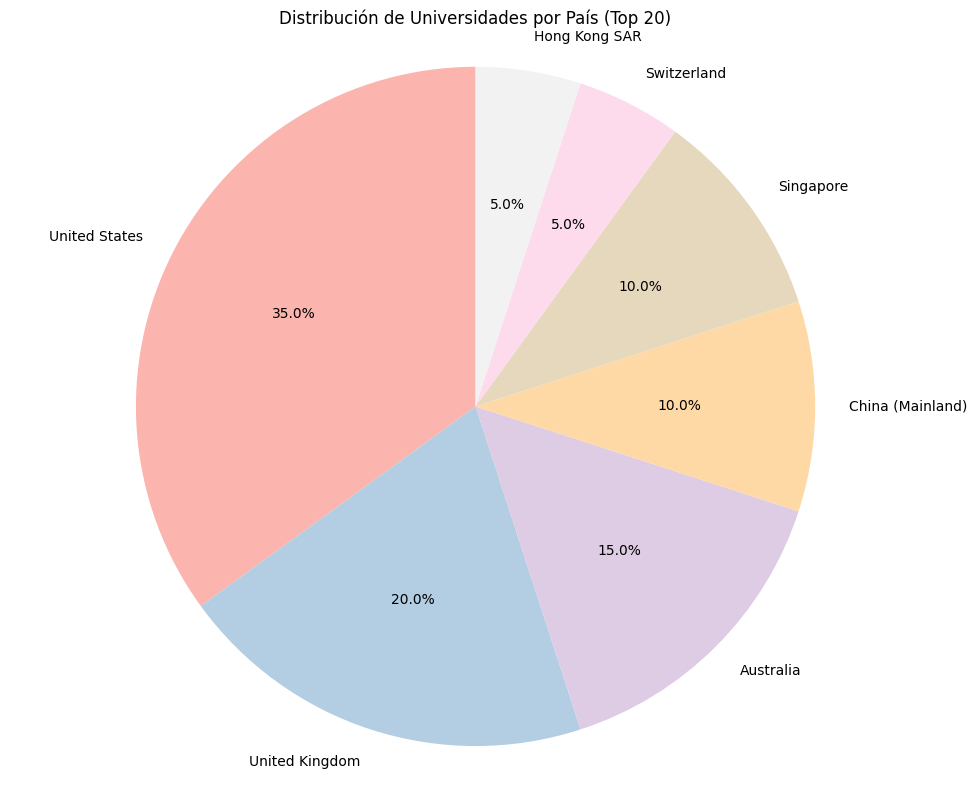

In [ ]:
top_20 = df.head(20)
country_counts = top_20['Country'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Pastel1(np.linspace(0, 1, len(country_counts))))
plt.title('Distribución de Universidades por País (Top 20)')
plt.axis('equal')  # Para que el pie chart sea circular
plt.tight_layout()
plt.show()

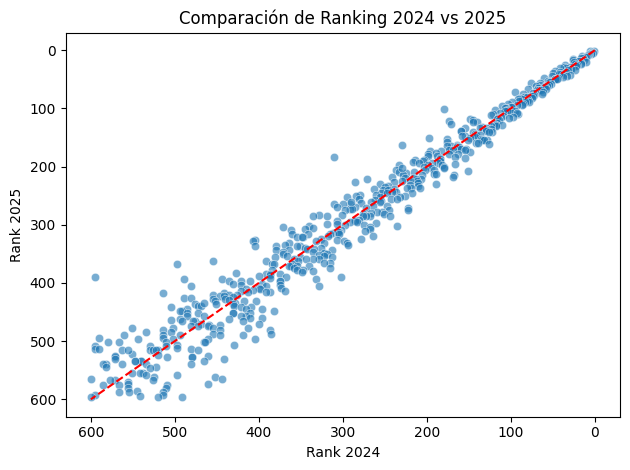

In [ ]:
#Evolución Ranking 2024 vs 2025
sns.scatterplot(data=df, x="Rank2024", y="Rank2025", alpha=0.6)
plt.plot([0,600],[0,600], color="red", linestyle="--")
plt.title("Comparación de Ranking 2024 vs 2025")
plt.xlabel("Rank 2024")
plt.ylabel("Rank 2025")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

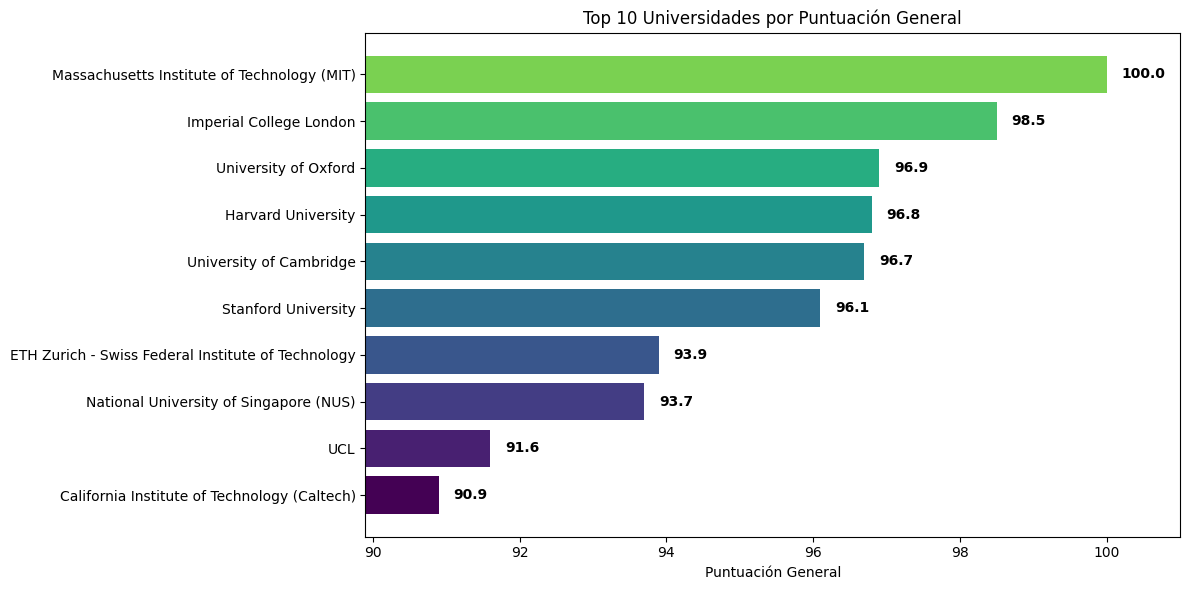

In [ ]:
#Top 10 universidades por puntuación general
top_10 = df.head(10).sort_values('OverallScore', ascending=True)
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10['Institution'], top_10['OverallScore'],
               color=plt.cm.viridis(np.linspace(0, 0.8, len(top_10))))
plt.xlabel('Puntuación General')
plt.title('Top 10 Universidades por Puntuación General')
plt.xlim(top_10['OverallScore'].min()-1, 101)
# Añadir etiquetas de valor
for i, (score, institution) in enumerate(zip(top_10['OverallScore'], top_10['Institution'])):
    plt.text(score + 0.2, i, f'{score:.1f}', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

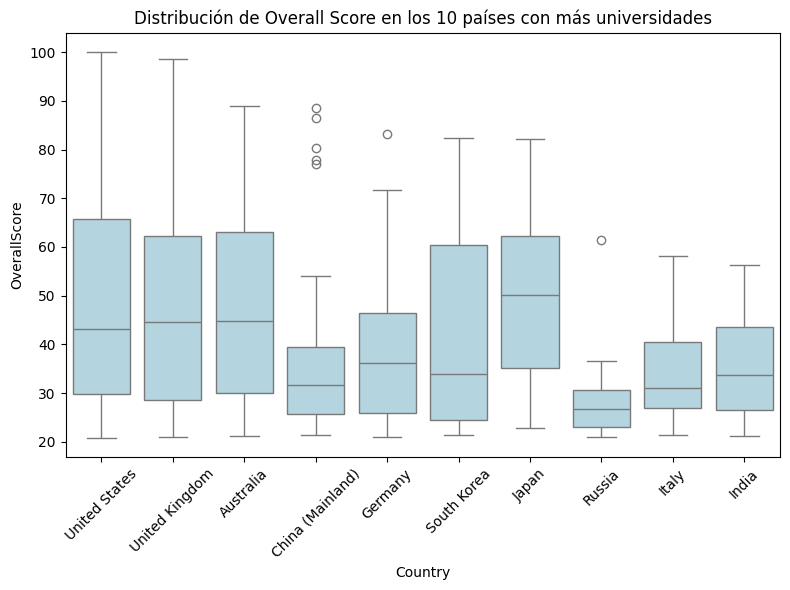

In [ ]:
#Boxplot de OverallScore por país (Top 10)
top10_countries = df["Country"].value_counts().head(10).index
plt.figure(figsize=(8,6))
sns.boxplot(data=df[(df["Country"].isin(top10_countries)) & (df["OverallScore"].notna())],
            x="Country",y="OverallScore",color="lightblue")
plt.title("Distribución de Overall Score en los 10 países con más universidades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Observaciones

¿Que patrones saltan a la vista?

Se puede apreciar un patron singular, en donde las 10 mejores universidades tienen un puntaje mayor a 90 puntos junto con una diferencia entre ellas de menos de 3 puntos por puesto de diferencia, esto nos da entender una tendencia de igualdad entre universidades de alto estatus.

¿Qué cosas no esperabas?

Sinceramente, jamás esperamos que una concentración de las mejores universidades del mundo se encontrara en el Reino Unido,  siempre pensamos que países como EEUU , Japón o Corea del Sur liderarían el gráfico.


Además, no esperábamos que Harvard estaría casi a la par con Oxford,  pensábamos que Oxford era totalmente superior.


Se esperaba que China estuviera a la par con la cantidad de universidades de Estados Unidos, pero por los gráficos expuestos, esto queda refutado.

**¿Hay alguna relación interesante?**

Podemos ver en los graficos que una gran parte de las universidades que estan en la base datos, pertenece a EEUU, dandonos a entender que existe una relación entre la Distribución de Universidades por pais (Top 20) y la cantidad de universidades que hay por país, por ejemplo un dato interesante que logramos inferir fue que Reino Unido con menos de la mitad de universidades que Estados Unidos, pueda competir al concentrar un 20% de las mejores universidades posicionadas en el top 20, mientras que EEUU tiene la mayor cantidad de universidades y solo tiene un 35% de concentracion en el top 20.


La cantidad de universidades que hay en Australia es poca comparada con los EEUU pero aún así tiene una concentracion del 15% de las top 20 universidades, informacion muy util para aquellos que desean vivir en Australia.

### Selección de variables
##### Para nuestra selección de variables decidimos utilizar las siguientes 4 columnas <br>


- OverallScore (principal)
- Institution (principal)
- Country (secundaria)
- Rank 2024 - 2025 (secundario)

## Pregunta de hipotesis